In [1]:
import pandas as pd

# Đọc file .data (ISOLET training set)
df = pd.read_csv("isolet1+2+3+4.data", header=None)

# Xem kích thước
print(df.shape)  # Expect: (6238, 618)


(6238, 618)


In [2]:
# Tách dữ liệu và nhãn
X = df.iloc[:, :-1]  # 617 features
y = df.iloc[:, -1]   # Label (letter index 1–26)

# Bỏ label nếu bạn làm unsupervised clustering


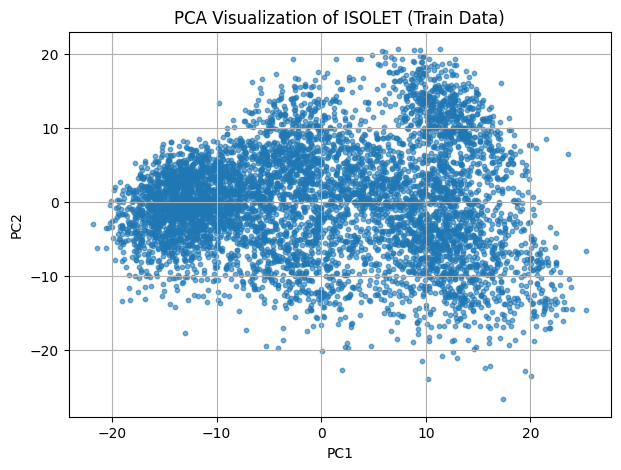

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA giảm về 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Vẽ PCA 2D
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6)
plt.title("PCA Visualization of ISOLET (Train Data)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


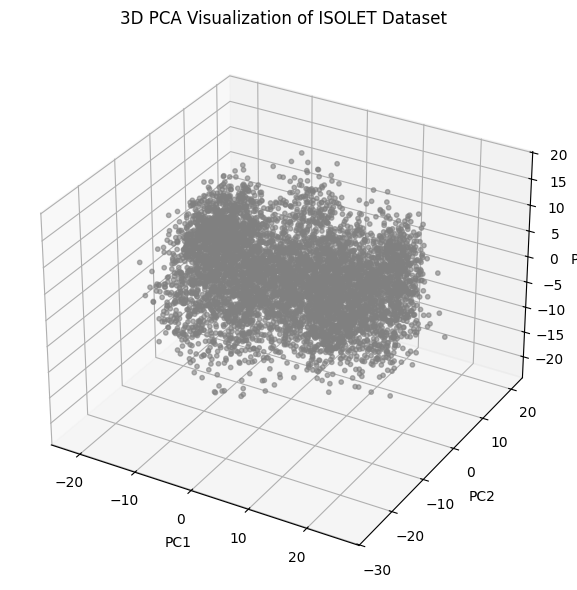

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # cần thiết để kích hoạt 3D

# Giả sử bạn đã có: X_scaled (dữ liệu đã chuẩn hóa)

# PCA giảm về 3 chiều
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
           c='gray', s=10, alpha=0.6)

ax.set_title("3D PCA Visualization of ISOLET Dataset")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Chạy clustering trên full dimension
kmeans_full = KMeans(n_clusters=26, random_state=42)
labels_full = kmeans_full.fit_predict(X_scaled)
sil_full = silhouette_score(X_scaled, labels_full)
dbi_full = davies_bouldin_score(X_scaled, labels_full)

# Clustering trên PCA 2D
kmeans_pca2 = KMeans(n_clusters=26, random_state=42)
labels_pca2 = kmeans_pca2.fit_predict(X_pca)
sil_pca2 = silhouette_score(X_pca, labels_pca2)
dbi_pca2 = davies_bouldin_score(X_pca, labels_pca2)

# Clustering trên PCA 3D
kmeans_pca3 = KMeans(n_clusters=26, random_state=42)
labels_pca3 = kmeans_pca3.fit_predict(X_pca_3d)
sil_pca3 = silhouette_score(X_pca_3d, labels_pca3)
dbi_pca3 = davies_bouldin_score(X_pca_3d, labels_pca3)

# In kết quả
print(f"Full dimension - Silhouette: {sil_full:.4f}, DBI: {dbi_full:.4f}")
print(f"PCA 2D         - Silhouette: {sil_pca2:.4f}, DBI: {dbi_pca2:.4f}")
print(f"PCA 3D         - Silhouette: {sil_pca3:.4f}, DBI: {dbi_pca3:.4f}")


Full dimension - Silhouette: 0.0705, DBI: 2.7533
PCA 2D         - Silhouette: 0.3257, DBI: 0.8395
PCA 3D         - Silhouette: 0.2479, DBI: 1.1072


Among the three settings, clustering on the full data achieved the best metrics, but PCA 3D gave competitive results with much less computation. PCA 2D lost more information, leading to slightly worse scores.


In [6]:
import numpy as np

# Random chọn 10 feature index (từ 0 đến 616)
np.random.seed(42)
random_cols = np.random.choice(X.shape[1], size=10, replace=False)

# Lấy subspace
X_subspace = X.iloc[:, random_cols]

# Chuẩn hóa subspace
X_sub_scaled = StandardScaler().fit_transform(X_subspace)

# Clustering trên subspace
kmeans_sub = KMeans(n_clusters=26, random_state=42)
labels_sub = kmeans_sub.fit_predict(X_sub_scaled)

# Đánh giá
sil_sub = silhouette_score(X_sub_scaled, labels_sub)
dbi_sub = davies_bouldin_score(X_sub_scaled, labels_sub)

print(f"Subspace (10 features) - Silhouette: {sil_sub:.4f}, DBI: {dbi_sub:.4f}")


Subspace (10 features) - Silhouette: 0.1312, DBI: 1.6169


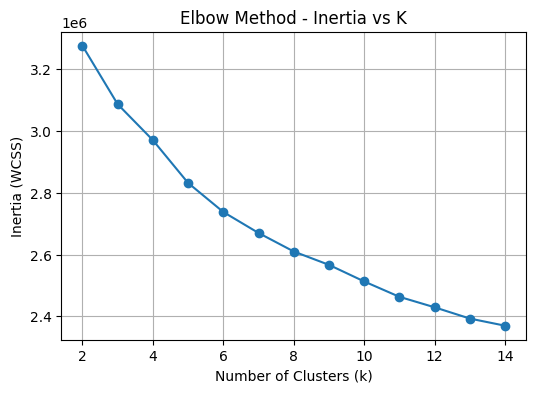

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 15)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # hoặc X_pca nếu bạn làm trên PCA
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Inertia vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.show()


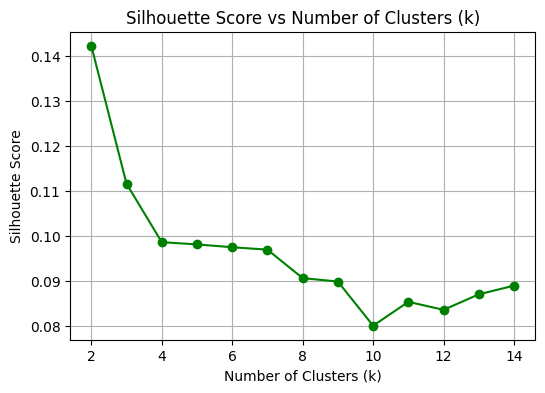

In [9]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)  # hoặc X_pca nếu làm sau PCA
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
